In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from sources

In [2]:
%pwd

'/home/sumedhshah94/w266_project_topmusichits/src/data'

In [3]:
#Load songs and charts data (use pwd to change to find directory)
songs = pd.read_csv("/home/sumedhshah94/w266_project_topmusichits/data/raw/spotify_songs.csv",',')
charts = pd.read_csv("/home/sumedhshah94/w266_project_topmusichits/data/raw/billboard_hot_100_charts.csv",',')

In [ ]:
# Preview songs data
songs.head()

In [ ]:
# Preview charts data
charts.head(10)

# Clean Songs and Charts Datasets

In [4]:
# CLEANING CHARTS DATASET
# Extract year
charts['WeekID'] = pd.to_datetime(charts['WeekID'].str.strip(),format='%m/%d/%Y')
charts['Year'] = pd.DatetimeIndex(charts['WeekID']).year
print("Original number of rows:",len(charts))


# Filter out columns and remove duplicate rows
new_charts = charts[['Year','Song','Performer','Weeks on Chart']]
new_charts = new_charts.sort_values('Weeks on Chart', ascending=False).drop_duplicates(['Year',
                                                                                        'Song',
                                                                                        'Performer'])
print("Number of rows after dropping duplicates:",len(new_charts))

# Filter out songs older than 1980 and newer than 2020
new_charts = new_charts[(new_charts['Year']>=1980) & (new_charts['Year']<=2020)]

print("Number of rows after filtering years:",len(new_charts))

Original number of rows: 327895
Number of rows after dropping duplicates: 35787
Number of rows after filtering years: 20359


In [ ]:
# Preview new charts dataframe
new_charts.head(20)

In [5]:
# Rename column
new_charts.rename(columns={'Weeks on Chart': 'Weeks_On_Chart'}, inplace=True)
new_charts.head()

,Year,Song,Performer,Weeks_On_Chart
302681,2014,Radioactive,Imagine Dragons,87
302673,2014,Sail,AWOLNATION,79
278572,2009,I'm Yours,Jason Mraz,76
278565,1998,How Do I Live,LeAnn Rimes,69
297512,2014,Counting Stars,OneRepublic,68


In [6]:
# CLEANING SONGS DATASET
print("Original length of songs dataset:",len(songs))

# Convert track name and artist to lower case for better merging with charts dataset
songs["track_name"] = songs["track_name"].str.lower()
songs["track_artist"] = songs["track_artist"].str.lower()

# Drop duplicate song/artist names
songs = songs.drop_duplicates(subset=['track_name','track_artist'])

# Extract year from track album release date
songs['Date'] = pd.to_datetime(songs['track_album_release_date'],
                                        format='%Y-%m-%d')
songs['song_year'] = pd.DatetimeIndex(songs['Date']).year



# Filter out songs older than 1980 and newer than 2020
songs = songs[(songs['song_year']>=1980) & (songs['song_year']<=2020)]

print("New length of songs dataset:",len(songs))

Original length of songs dataset: 18454
New length of songs dataset: 15823


# Merge datasets

In [7]:
# Make song and performer lowercase for better merging with songs dataset
new_charts["Song"] = new_charts["Song"].str.lower()
new_charts["Performer"] = new_charts["Performer"].str.lower()

In [8]:
# Merge dataframes (left) and check record sizes
songs_charts = songs.merge(new_charts,
                        left_on=['track_name','track_artist'],
                        right_on=['Song','Performer'],how='left')

# Check new length of merged dataset
print("Length of merged dataset:",len(songs_charts))


Length of merged dataset: 16601


In [9]:
# Include only english songs and genres excluding EDM
songs_charts = songs_charts[songs_charts.language=='en']
songs_charts = songs_charts[songs_charts.playlist_genre!='edm']

# Check new length after filtering
print("Length after filtering:",len(songs_charts))

Length after filtering: 12110


In [10]:
# Create new column that indicates whether song is on Billboard charts or not (1 or 0)
songs_charts['Hit'] = np.where(songs_charts['Weeks_On_Chart'].isnull(),0,1)

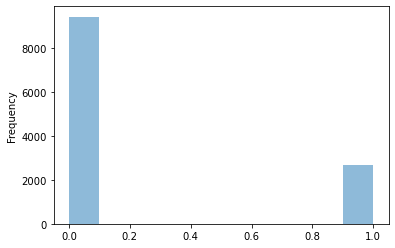

In [11]:
# See difference in number of hits vs non-hits in merged dataset
ax = songs_charts['Hit'].plot.hist(alpha=0.5)

In [12]:
# Rename column
songs_charts.rename(columns={'Year': 'trending_year'}, inplace=True)

# Drop some merged columns
songs_charts = songs_charts.drop(columns=['Date','track_id','track_album_id','track_album_release_date',
                                          'playlist_id','playlist_name','Song','Performer'])

In [13]:
# Convert trending_year and Weeks_On_Chart columns to integer datatype
songs_charts['trending_year'] = songs_charts['trending_year'].fillna(0)
songs_charts['trending_year'] = songs_charts['trending_year'].astype(int)

songs_charts['Weeks_On_Chart'] = songs_charts['Weeks_On_Chart'].fillna(0)
songs_charts['Weeks_On_Chart'] = songs_charts['Weeks_On_Chart'].astype(int)

# Verify change in data types
songs_charts.dtypes

track_name            object
track_artist          object
lyrics                object
track_popularity       int64
track_album_name      object
playlist_genre        object
playlist_subgenre     object
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
language              object
song_year              int64
trending_year          int64
Weeks_On_Chart         int64
Hit                    int64
dtype: object

In [14]:
# Delete duplicate songs that trended after 1 year
print("Length before deleting duplicates:",len(songs_charts))
songs_charts = songs_charts.sort_values(['track_name',
                                         'track_artist',
                                         'trending_year'], 
                                        ascending=True).drop_duplicates(['track_name',
                                                                         'track_artist',
                                                                         'song_year'])
print("Length after deleting duplicates:",len(songs_charts))

Length before deleting duplicates: 12110
Length after deleting duplicates: 11353


In [15]:
songs_charts.head(15)

,track_name,track_artist,lyrics,track_popularity,track_album_name,playlist_genre,playlist_subgenre,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,duration_ms,language,song_year,trending_year,Weeks_On_Chart,Hit
12787,#1 stunna,big tymers,"For sure, playboy Nigga can't out-stunt me whe...",0,I Got That Work (Explicit Version),rap,southern hip hop,0.552,0.839,2,...,0.004040,0.2580,0.569,89.070,281960,en,2000,0,0,0
16254,$20 fine,jimi hendrix,One more day feelin' this way Walkin' through ...,44,Both Sides of the Sky,rock,classic rock,0.569,0.887,0,...,0.431000,0.3450,0.738,120.949,299080,en,2018,0,0,0
13340,$ave dat money (feat. fetty wap & rich homie q...,lil dicky,"LD, AKA The Independent Variable Trap God, and...",69,Professional Rapper,rap,hip hop,0.858,0.697,2,...,0.000000,0.2240,0.364,98.012,290836,en,2015,0,0,0
14433,$dreams,max frost,Halos of diamonds dancing over your head My ey...,43,Intoxication,pop,indie poptimism,0.800,0.626,7,...,0.004160,0.1030,0.792,106.974,214080,en,2015,0,0,0
9754,'98 freestyle,big l,"Fuck all the glamours and glitz, I plan to get...",0,The Big Picture (Explicit Version),rap,gangster rap,0.608,0.598,1,...,0.000000,0.3210,0.905,175.767,129853,en,2000,0,0,0
3986,'til you do me right,after 7,I was in love with you I gave my heart to you ...,39,The Very Best Of After 7,r&b,new jack swing,0.612,0.542,5,...,0.000000,0.0763,0.433,76.744,294600,en,1997,1995,22,1
10826,'till i collapse,eminem,"'Cause sometimes you just feel tired, feel wea...",83,The Eminem Show,rap,gangster rap,0.548,0.847,1,...,0.000000,0.0816,0.100,171.447,297787,en,2002,0,0,0
7972,...baby one more time,britney spears,"Oh baby, baby Oh baby, baby Oh baby, baby, how...",75,...Baby One More Time (Digital Deluxe Version),pop,dance pop,0.759,0.699,0,...,0.000131,0.4430,0.907,92.960,211067,en,1999,1998,6,1
6588,...til the cops come knockin',maxwell,Didn't you dig the way I rubbed yo back girl W...,48,Maxwell's Urban Hang Suite,r&b,urban contemporary,0.711,0.559,0,...,0.038900,0.1360,0.583,130.017,416000,en,1996,0,0,0
12459,...to be loved,papa roach,"Listen up, turn it up and rock it out Party on...",55,The Paramour Sessions,rock,hard rock,0.478,0.977,8,...,0.000000,0.5090,0.482,96.047,182120,en,2006,0,0,0


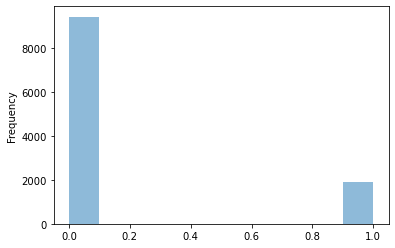

In [18]:
# See difference in number of hits vs non-hits in completed dataset
ax = songs_charts['Hit'].plot.hist(alpha=0.5)

In [16]:
# Save dataset to raw/interim
songs_charts.to_csv("/home/sumedhshah94/w266_project_topmusichits/data/interim/songs_charts.csv",index=False)

## Misc Analysis

In [17]:
# Verify no duplicate records
duplicate = songs_charts[songs_charts.duplicated(['track_name','track_artist'])].sort_values('track_name')
duplicate.head(10)

,track_name,track_artist,lyrics,track_popularity,track_album_name,playlist_genre,playlist_subgenre,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,duration_ms,language,song_year,trending_year,Weeks_On_Chart,Hit


In [ ]:
# Check specific songs that have duplicate records, if any
new_charts[new_charts.Song=='22']

In [ ]:
songs = pd.read_csv("/home/sumedhshah94/w266_project_topmusichits/data/interim/songs_charts.csv",',')
songs.head(20)

In [ ]:
songs_2 = songs

In [ ]:
songs_2.dtypes

In [ ]:
# All hits
my_crosstab = pd.crosstab(index=songs_2["playlist_genre"], 
                            columns=songs["Hit"],
                             margins=True)
my_crosstab

In [ ]:
# Check hits by song year
my_crosstab_2 = pd.crosstab(index=songs_2["song_year"], 
                            columns=songs_2["Hit"],
                             margins=True)
my_crosstab_2